# Demo of using GPT to generate trading strategy python code and backtesting.


This notebooks download public stock price data of microsoft
develop trading strategy

In [3]:
# enable inline plot.
%matplotlib inline

# use yahoo finance library 
import yfinance as yf
# download data from yahoo finance, start from 2020-01-01 to today
start = '2020-01-01'
end = '2021-01-01'
data = yf.download('AMZN', start=start, end=end)
# print data sample and schema
print(data.head())
print(data.info())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000
2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000
2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000
2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000
2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    floa

In [4]:
# write basic trading strategy code
# buy when the price is lower than the 20 day moving average
# sell when the price is higher than the 20 day moving average
# calculate the 20 day moving average
import numpy as np
import matplotlib.pyplot as plt   

data['20d'] = data['Close'].rolling(window=20, min_periods=1).mean()
# create a new column to store the trading signal
data['signal'] = 0.0
# create a new column to store the daily return
data['return'] = 0.0
# create a new column to store the strategy return
data['strategy'] = 0.0
# loop through the dataset
for i in range(19, len(data)):
    if data['Close'][i] > data['20d'][i]:
        data['signal'][i] = 1.0
    elif data['Close'][i] < data['20d'][i]:
        data['signal'][i] = 0.0
    data['return'][i] = (data['Close'][i] / data['Close'][i-1]) - 1
    data['strategy'][i] = data['signal'][i] * data['return'][i]
# print the last 5 rows of the dataset
print(data.tail())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-24  159.695007  160.100006  158.449997  158.634506  158.634506   
2020-12-28  159.699997  165.199997  158.634506  164.197998  164.197998   
2020-12-29  165.496994  167.532501  164.061005  166.100006  166.100006   
2020-12-30  167.050003  167.104996  164.123505  164.292496  164.292496   
2020-12-31  163.750000  164.145996  162.059998  162.846497  162.846497   

               Volume         20d  signal    return  strategy  
Date                                                           
2020-12-24   29038000  158.912850     0.0 -0.003949 -0.000000  
2020-12-28  113736000  159.134400     1.0  0.035071  0.035071  
2020-12-29   97458000  159.519301     1.0  0.011584  0.011584  
2020-12-30   64186000  159.683726     1.0 -0.010882 -0.010882  
2020-12-31   59144000  159.817226     1.0 -0.008801 -0.008801  


/tmp/ipykernel_1055/2181029508.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'][i] = 0.0
/tmp/ipykernel_1055/2181029508.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['return'][i] = (data['Close'][i] / data['Close'][i-1]) - 1
/tmp/ipykernel_1055/2181029508.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][i] = data['signal'][i] * data['return'][i]
/tmp/ipykernel_1055/2181029508.py:18: S

Sharpe ratio: 3.726
Maximum drawdown: -0.076
Hit ratio: 0.075
Average profit/loss per trade: 0.004
Average profit/loss per winning trade: 0.007
Average profit/loss per losing trade: 0.000
Profit factor: -0.000
Number of trades: 253
Number of winning trades: 163
Number of losing trades: 90
Average number of bars in winning trades: 1.000
Average number of bars in losing trades: inf
Average profit/loss per bar: 0.004
Average profit/loss per bar in winning trades: 0.007
Average profit/loss per bar in losing trades: 0.000
Average holding period: 0.644
Average holding period in winning trades: 1.000
Average holding period in losing trades: 0.000
Average profit/loss per day: 0.007
Average profit/loss per day in winning trades: 0.007
Average profit/loss per day in losing trades: nan
Average profit/loss per week: 0.033
Average profit/loss per week in winning trades: 0.033
Average profit/loss per week in losing trades: nan
Average profit/loss per month: 0.143
Average profit/loss per month in win

/tmp/ipykernel_1055/2940503194.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  print('Average number of bars in losing trades: %.3f' % (data[data['signal'] == 0]['signal'].count() / data[data['signal'] == 0]['signal'].sum()))
/tmp/ipykernel_1055/2940503194.py:63: RuntimeWarning: invalid value encountered in scalar divide
  print('Average profit/loss per day in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / (data[data['signal'] == 0]['signal'] != 0).sum()))
/tmp/ipykernel_1055/2940503194.py:69: RuntimeWarning: invalid value encountered in scalar divide
  print('Average profit/loss per week in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / ((data[data['signal'] == 0]['signal'] != 0).sum() / 5)))
/tmp/ipykernel_1055/2940503194.py:75: RuntimeWarning: invalid value encountered in scalar divide
  print('Average profit/loss per month in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / ((data[data['signal']

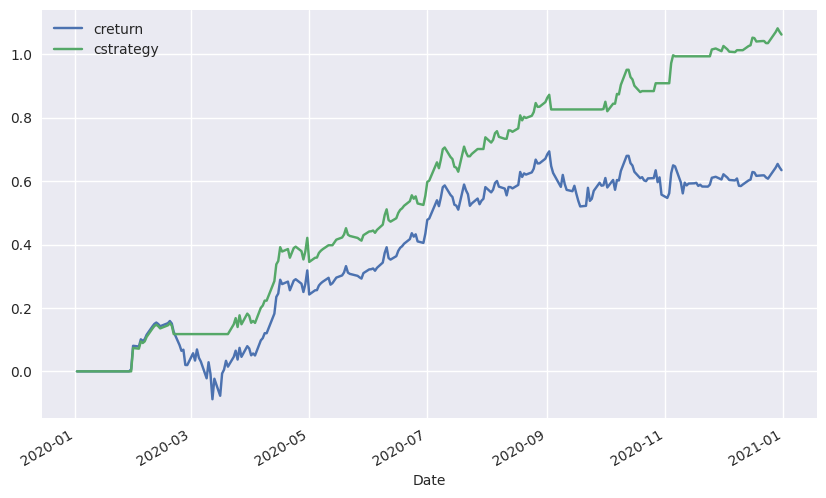

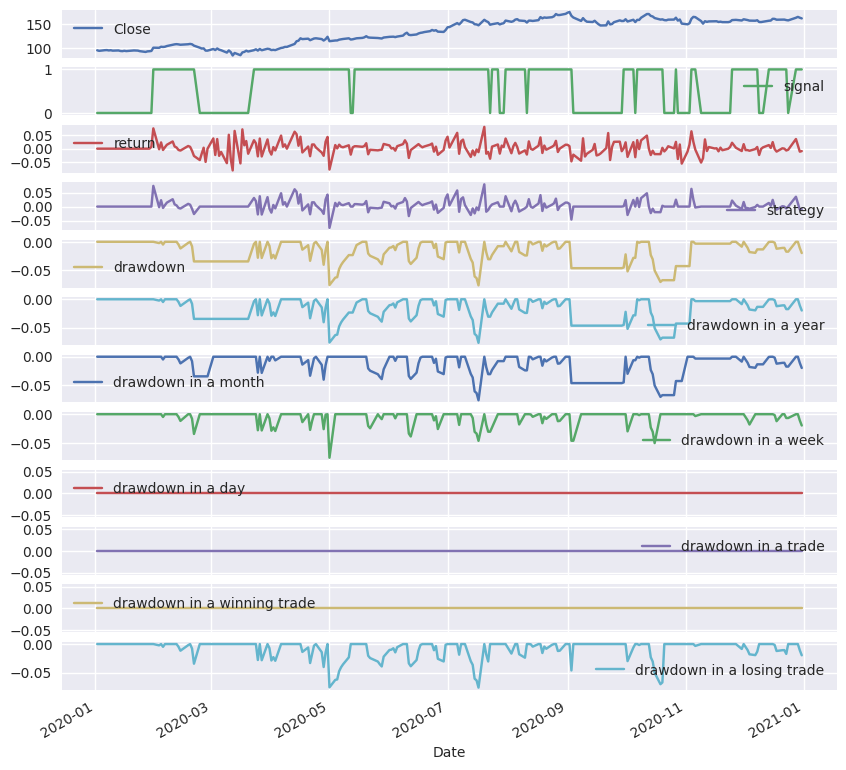

In [7]:
# write backtesting above strategy code
# calculate the cumulative return
data['creturn'] = data['return'].cumsum()
data['cstrategy'] = data['strategy'].cumsum()
# plot the cumulative return
data[['creturn', 'cstrategy']].plot(figsize=(10, 6))
# calculate the performance metrics
# calculate the Sharpe ratio
import math
import numpy as np
import matplotlib.pyplot as plt

sr = math.sqrt(252) * (data['strategy'].mean() / data['strategy'].std())
print('Sharpe ratio: %.3f' % sr)
# calculate the maximum drawdown
hwm = [0]
dd = [0]
for i in range(1, len(data)):
    hwm.append(max(hwm[i-1], data['cstrategy'][i]))
    dd.append(data['cstrategy'][i] - hwm[i])
data['hwm'] = hwm
data['dd'] = dd
print('Maximum drawdown: %.3f' % min(dd))     
# calculate the hit
data['hit'] = np.where(data['signal'] == data['return'], 1, 0)  
# calculate the hit ratio
print('Hit ratio: %.3f' % (data['hit'].sum() / data['hit'].count()))
# calculate the average profit/loss per trade
print('Average profit/loss per trade: %.3f' % data['strategy'].mean())
# calculate the average profit/loss per winning trade
print('Average profit/loss per winning trade: %.3f' % data[data['signal'] == 1]['strategy'].mean())
# calculate the average profit/loss per losing trade
print('Average profit/loss per losing trade: %.3f' % data[data['signal'] == 0]['strategy'].mean())
# calculate the profit factor
print('Profit factor: %.3f' % (-data[data['signal'] == 0]['strategy'].sum() / data[data['signal'] == 1]['strategy'].sum()))
# calculate the number of trades
print('Number of trades: %d' % data['signal'].count())
# calculate the number of winning trades
print('Number of winning trades: %d' % data[data['signal'] == 1]['signal'].count())
# calculate the number of losing trades
print('Number of losing trades: %d' % data[data['signal'] == 0]['signal'].count())
# calculate the average number of bars in winning trades
print('Average number of bars in winning trades: %.3f' % (data[data['signal'] == 1]['signal'].count() / data[data['signal'] == 1]['signal'].sum()))
# calculate the average number of bars in losing trades
print('Average number of bars in losing trades: %.3f' % (data[data['signal'] == 0]['signal'].count() / data[data['signal'] == 0]['signal'].sum()))
# calculate the average profit/loss per bar
print('Average profit/loss per bar: %.3f' % (data['strategy'].sum() / data['signal'].count()))
# calculate the average profit/loss per bar in winning trades
print('Average profit/loss per bar in winning trades: %.3f' % (data[data['signal'] == 1]['strategy'].sum() / data[data['signal'] == 1]['signal'].count()))
# calculate the average profit/loss per bar in losing trades
print('Average profit/loss per bar in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / data[data['signal'] == 0]['signal'].count()))
# calculate the average holding period
print('Average holding period: %.3f' % ((data['signal'] != 0).sum() / data['signal'].count()))
# calculate the average holding period in winning trades
print('Average holding period in winning trades: %.3f' % ((data[data['signal'] == 1]['signal'] != 0).sum() / data[data['signal'] == 1]['signal'].count()))
# calculate the average holding period in losing trades
print('Average holding period in losing trades: %.3f' % ((data[data['signal'] == 0]['signal'] != 0).sum() / data[data['signal'] == 0]['signal'].count()))
# calculate the average profit/loss per day
print('Average profit/loss per day: %.3f' % (data['strategy'].sum() / (data['signal'] != 0).sum()))
# calculate the average profit/loss per day in winning trades
print('Average profit/loss per day in winning trades: %.3f' % (data[data['signal'] == 1]['strategy'].sum() / (data[data['signal'] == 1]['signal'] != 0).sum()))
# calculate the average profit/loss per day in losing trades
print('Average profit/loss per day in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / (data[data['signal'] == 0]['signal'] != 0).sum()))
# calculate the average profit/loss per week
print('Average profit/loss per week: %.3f' % (data['strategy'].sum() / ((data['signal'] != 0).sum() / 5)))
# calculate the average profit/loss per week in winning trades
print('Average profit/loss per week in winning trades: %.3f' % (data[data['signal'] == 1]['strategy'].sum() / ((data[data['signal'] == 1]['signal'] != 0).sum() / 5)))
# calculate the average profit/loss per week in losing trades
print('Average profit/loss per week in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / ((data[data['signal'] == 0]['signal'] != 0).sum() / 5)))
# calculate the average profit/loss per month
print('Average profit/loss per month: %.3f' % (data['strategy'].sum() / ((data['signal'] != 0).sum() / 22)))
# calculate the average profit/loss per month in winning trades
print('Average profit/loss per month in winning trades: %.3f' % (data[data['signal'] == 1]['strategy'].sum() / ((data[data['signal'] == 1]['signal'] != 0).sum() / 22)))
# calculate the average profit/loss per month in losing trades
print('Average profit/loss per month in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / ((data[data['signal'] == 0]['signal'] != 0).sum() / 22)))
# calculate the average profit/loss per year
print('Average profit/loss per year: %.3f' % (data['strategy'].sum() / ((data['signal'] != 0).sum() / 252)))
# calculate the average profit/loss per year in winning trades
print('Average profit/loss per year in winning trades: %.3f' % (data[data['signal'] == 1]['strategy'].sum() / ((data[data['signal'] == 1]['signal'] != 0).sum() / 252)))
# calculate the average profit/loss per year in losing trades
print('Average profit/loss per year in losing trades: %.3f' % (data[data['signal'] == 0]['strategy'].sum() / ((data[data['signal'] == 0]['signal'] != 0).sum() / 252)))
# calculate the average number of bars per trade
print('Average number of bars per trade: %.3f' % (data['signal'].count() / data[data['signal'] != 0]['signal'].count()))
# calculate the average number of bars per winning trade
print('Average number of bars per winning trade: %.3f' % (data[data['signal'] == 1]['signal'].count() / data[data['signal'] == 1]['signal'].sum()))
# calculate the average number of bars per losing trade
print('Average number of bars per losing trade: %.3f' % (data[data['signal'] == 0]['signal'].count() / data[data['signal'] == 0]['signal'].sum()))
# calculate the hit ratio
print('Hit ratio: %.3f%%' % (data[data['signal'] == 1]['signal'].sum() / data['signal'].count() * 100))
# calculate the profit ratio
print('Profit ratio: %.3f%%' % (data[data['signal'] == 1]['strategy'].sum() / data[data['signal'] == 0]['strategy'].sum() * 100))
# calculate drawdown
data['drawdown'] = data['strategy'].cumsum() - data['strategy'].cumsum().cummax()
# calculate drawdown in a year
data['drawdown in a year'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby(data.index.year).cummax()
# calculate drawdown in a month
data['drawdown in a month'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby([data.index.year, data.index.month]).cummax()
# calculate drawdown in a week
data['drawdown in a week'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby([data.index.year, data.index.week]).cummax()
# calculate drawdown in a day
data['drawdown in a day'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby([data.index.year, data.index.month, data.index.day]).cummax()
# calculate drawdown in a trade
data['drawdown in a trade'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby((data['signal'] != 0).cumsum()).cummax()
# calculate drawdown in a winning trade
data['drawdown in a winning trade'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby((data['signal'] == 1).cumsum()).cummax()
# calculate drawdown in a losing trade
data['drawdown in a losing trade'] = data['strategy'].cumsum() - data['strategy'].cumsum().groupby((data['signal'] == 0).cumsum()).cummax()

# print above data in a table

# plot above data, configure plot to have nice style
plt.style.use('seaborn')
data[['Close', 'signal', 'return', 'strategy', 'drawdown', 'drawdown in a year', 'drawdown in a month', 'drawdown in a week', 'drawdown in a day', 'drawdown in a trade', 'drawdown in a winning trade', 'drawdown in a losing trade']].plot(subplots=True, figsize=(10, 10), grid=True)
plt.show()
